In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the data file in df

**Read the csv data file and disply its head**

In [2]:
# Code here please
df = pd.read_csv('mammographic_masses_data_clean.csv')
df.head()

,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


,BI-RADS,Age,Shape,Margin,Density,Target
0,5,67,3,5,3,1
1,5,58,4,5,3,1
2,4,28,1,1,3,0
3,5,57,1,5,3,1
4,5,76,1,4,3,1


**How many data entries you have?**

In [3]:
# Code here please
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BI-RADS  830 non-null    int64
 1   Age      830 non-null    int64
 2   Shape    830 non-null    int64
 3   Margin   830 non-null    int64
 4   Density  830 non-null    int64
 5   Target   830 non-null    int64
dtypes: int64(6)
memory usage: 39.0 KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 6 columns):
BI-RADS    830 non-null int64
Age        830 non-null int64
Shape      830 non-null int64
Margin     830 non-null int64
Density    830 non-null int64
Target     830 non-null int64
dtypes: int64(6)
memory usage: 39.0 KB


**Which type of cancer is common?**

In [4]:
# Code here please
df['Target'].value_counts()

Target
0    427
1    403
Name: count, dtype: int64

0    427
1    403
Name: Target, dtype: int64

**Reproduce the output to show some statistics**

In [5]:
# Code here please
df.describe()

,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


,BI-RADS,Age,Shape,Margin,Density,Target
count,830.000000,830.000000,830.000000,830.000000,830.000000,830.000000
mean,4.393976,55.781928,2.781928,2.813253,2.915663,0.485542
std,1.888371,14.671782,1.242361,1.567175,0.350936,0.500092
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,46.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


** Do the Train Test Split** using test size 0.3 

In [6]:
# Code here please

from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Decision Tree
**Importing decision tree classifier and create its instance**

In [7]:
# Code here please
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

**Fit the training data to the model**

In [8]:
# Code here please
dt.fit(X_train, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

**What is the Score of the model?**

In [9]:
# Code here please

# dt.predict(X_test)
dt.score(X_test, y_test)

0.751004016064257

Confusion Matrix

In [11]:
from sklearn.metrics import confusion_matrix

# Predicting on the test data
y_pred = dt.predict(X_test)

# Generating the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm


array([[99, 28],
       [34, 88]], dtype=int64)

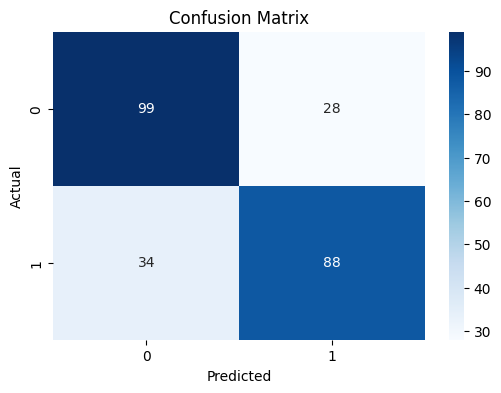

In [12]:
# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

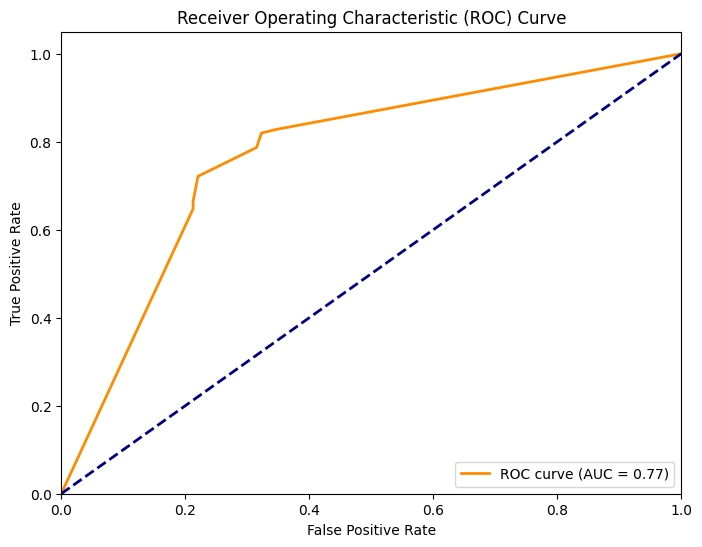

In [13]:
from sklearn.metrics import roc_curve, auc

# Predicting the probabilities for the positive class (1)
y_prob = dt.predict_proba(X_test)[:, 1]

# Calculating the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculating the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()